Issue

With the corona virus crisis upon us, I would like to take this opportunity to explore the strength and weaknesses of Ontario's healthcare system. Specifically, I would like to explore the connection between people's perceived health and their accessibility to a family doctor and them receiving a flu shot. Further, I would like to produce a map of people having access to a healthcare provider for Canada, as well as people receiving flu shots, so we can extrapolate to the country on whether having these two factors would be helpful in improving perceived health.

Audience

This is intended for all Canadians to know how reliable our healthcare system is in the face of epidemics.

Data

Census Data: Access to healthcare provider by region, perceived overall health
foursquare data: Location of regions for mapping of drug stores

In [51]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('Cases.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())

            Ontario  BC  Quebec  Alberta  Repatriated Cdns  Manitoba  \
Date                                                                   
2020-02-24        3   7     NaN      NaN               NaN       NaN   
2020-02-25        3   7     NaN      NaN               NaN       NaN   
2020-02-26        5   7     NaN      NaN               NaN       NaN   
2020-02-27        5   7     NaN      NaN               NaN       NaN   
2020-02-28        7   7     NaN      NaN               NaN       NaN   

            New Brunswick  
Date                       
2020-02-24            NaN  
2020-02-25            NaN  
2020-02-26            NaN  
2020-02-27            NaN  
2020-02-28            NaN  


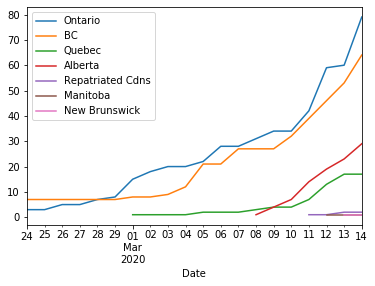

In [52]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('Cases.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

In [65]:
import pandas as pd
import numpy as np
df = pd.read_csv('Data.csv', index_col = 0)
df

,Perceived-health-very-good-or-excellent-13,Perceived-health-fair-or-poor-13,Perceived-mental-health-very-good-or-excellent-14,Perceived-mental-health-fair-or poor-14,Perceived-life-stress-most days-quite-a-bit-or-extremely-stressful-15,Has-a-regular-healthcare-provider-45
Peel Region,733600,134300,849500,72600,277200,1145400
York Region,592700,80000,681500,63900,206400,911000
City of Toronto,1530400,258000,1736300,192900,564200,2177500


In [66]:
%%capture
! pip install seaborn

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(df.dtypes)

Perceived-health-very-good-or-excellent-13                               int64
Perceived-health-fair-or-poor-13                                         int64
Perceived-mental-health-very-good-or-excellent-14                        int64
Perceived-mental-health-fair-or poor-14                                  int64
Perceived-life-stress-most days-quite-a-bit-or-extremely-stressful-15    int64
Has-a-regular-healthcare-provider-45                                     int64
dtype: object


([], <a list of 0 Text yticklabel objects>)

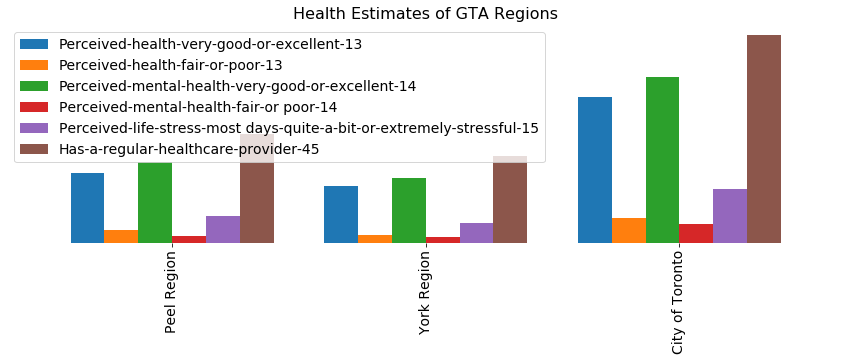

In [68]:
ax=df.plot(kind='bar', figsize=(15,4),width = 0.8, edgecolor=None)
plt.legend(labels=df.columns, fontsize= 14)
plt.title("Health Estimates of GTA Regions", fontsize=16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

(0, 1634364.3658343526)

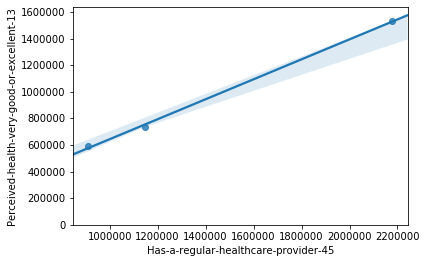

In [56]:
sns.regplot(x="Has-a-regular-healthcare-provider-45", y="Perceived-health-very-good-or-excellent-13", data=df)
plt.ylim(0,)

(0, 1731937.244313297)

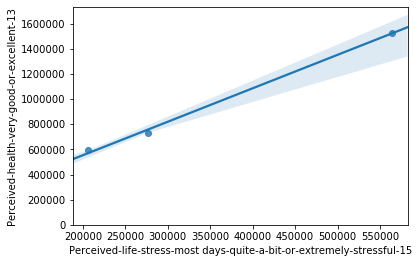

In [57]:
sns.regplot(x="Perceived-life-stress-most days-quite-a-bit-or-extremely-stressful-15", y="Perceived-health-very-good-or-excellent-13", data=df)
plt.ylim(0,)

(0, 383547.3950015699)

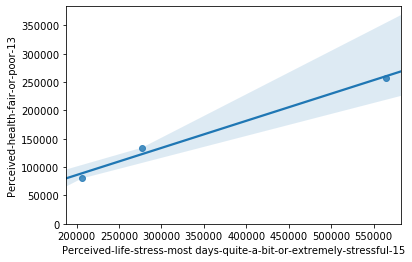

In [59]:
sns.regplot(x="Perceived-life-stress-most days-quite-a-bit-or-extremely-stressful-15", y="Perceived-health-fair-or-poor-13", data=df)
plt.ylim(0,)

(0, 404587.4444524343)

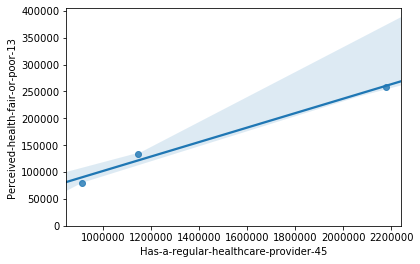

In [60]:
sns.regplot(x="Has-a-regular-healthcare-provider-45", y="Perceived-health-fair-or-poor-13", data=df)
plt.ylim(0,)

In [1]:
! pip install lxml
! pip install requests
! pip install beautifulsoup4

import pandas as pd
import requests
from bs4 import BeautifulSoup

req = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
neighborhood=pd.DataFrame(df[0])
neighborhood

     |████████████████████████████████| 5.8MB 5.4MB/s eta 0:00:01
     |████████████████████████████████| 112kB 2.4MB/s eta 0:00:01


,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


In [2]:
path = 'http://cocl.us/Geospatial_data'
coordinates = pd.read_csv(path)
coordinates

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [3]:
merged_df = pd.merge(neighborhood, coordinates, left_on = 'Postcode', right_on = 'Postal Code')
merged_borough = merged_df.drop_duplicates(['Borough'])
merged_boroughtrim = merged_borough.drop(["Postal Code", "Neighbourhood"], axis=1)
merged_boroughtrim

,Postcode,Borough,Latitude,Longitude
0,M3A,North York,43.753259,-79.329656
2,M5A,Downtown Toronto,43.654260,-79.360636
6,M9A,Etobicoke,43.667856,-79.532242
7,M1B,Scarborough,43.806686,-79.194353
10,M4B,East York,43.706397,-79.309937
27,M6C,York,43.693781,-79.428191
35,M4E,East Toronto,43.676357,-79.293031
51,M6H,West Toronto,43.669005,-79.442259
111,M4N,Central Toronto,43.728020,-79.388790
135,M7R,Mississauga,43.636966,-79.615819


In [ ]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

Solving environment: - 

In [ ]:
CLIENT_ID = 'UORX2X1AZPA2RFEEWXJWKUGR3JJK2YBZDMLHNNM2DOCAC2RH' # your Foursquare ID
CLIENT_SECRET = 'W4J02XPUEYPJYXOIOR1IIAXF0HVFTHO1AOSZ15LHFQ1GXDFQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

merged_boroughtrim.loc[0, 'Borough']
borough_latitude = merged_boroughtrim.loc[0, 'Latitude'] # neighborhood latitude value
borough_longitude = merged_boroughtrim.loc[0, 'Longitude'] # neighborhood longitude value

borough_name = merged_boroughtrim.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_latitude, 
                                                               borough_longitude))
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)
url

results = requests.get(url).json()
results

In [ ]:
import json # library to handle JSON files
from pandas.io.json import json_normalize

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

toronto_venues = getNearbyVenues(names=merged_boroughtrim['Borough'],
                                   latitudes=merged_boroughtrim['Latitude'],
                                   longitudes=merged_boroughtrim['Longitude'],
                                  )

In [ ]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Borough'] = toronto_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Borough').count().reset_index()
toronto_merged = pd.merge(toronto_grouped, merged_boroughtrim, left_on = 'Borough', right_on = 'Borough')
Pharmacy=toronto_merged[['Borough', 'Pharmacy', 'Latitude', 'Longitude']]
Pharmacy

In [ ]:
df1 = Pharmacy.drop([Pharmacy.index[1], Pharmacy.index[2], Pharmacy.index[3], Pharmacy.index[4], Pharmacy.index[5], Pharmacy.index[6], Pharmacy.index[7], Pharmacy.index[8]])
df1

In [ ]:
df2 = Pharmacy.drop([Pharmacy.index[0], Pharmacy.index[2], Pharmacy.index[3], Pharmacy.index[4], Pharmacy.index[5], Pharmacy.index[6], Pharmacy.index[7], Pharmacy.index[8]])
df2

In [ ]:
df3 = Pharmacy.drop([Pharmacy.index[0], Pharmacy.index[1], Pharmacy.index[3], Pharmacy.index[4], Pharmacy.index[5], Pharmacy.index[6], Pharmacy.index[7], Pharmacy.index[8]])
df3

In [ ]:
df4 = Pharmacy.drop([Pharmacy.index[0], Pharmacy.index[1], Pharmacy.index[2], Pharmacy.index[4], Pharmacy.index[5], Pharmacy.index[6], Pharmacy.index[7], Pharmacy.index[8]])
df4

In [ ]:
df5 = Pharmacy.drop([Pharmacy.index[0], Pharmacy.index[1], Pharmacy.index[2], Pharmacy.index[3], Pharmacy.index[5], Pharmacy.index[6], Pharmacy.index[7], Pharmacy.index[8]])
df5

In [ ]:
df6 = Pharmacy.drop([Pharmacy.index[0], Pharmacy.index[1], Pharmacy.index[2], Pharmacy.index[3], Pharmacy.index[4], Pharmacy.index[6], Pharmacy.index[7], Pharmacy.index[8]])
df6

In [ ]:
df7 = Pharmacy.drop([Pharmacy.index[0], Pharmacy.index[1], Pharmacy.index[2], Pharmacy.index[3], Pharmacy.index[4], Pharmacy.index[5], Pharmacy.index[7], Pharmacy.index[8]])
df7

In [ ]:
df8 = Pharmacy.drop([Pharmacy.index[0], Pharmacy.index[1], Pharmacy.index[2], Pharmacy.index[3], Pharmacy.index[4], Pharmacy.index[5], Pharmacy.index[6], Pharmacy.index[8]])
df8

In [ ]:
df9 = Pharmacy.drop([Pharmacy.index[0], Pharmacy.index[1], Pharmacy.index[2], Pharmacy.index[3], Pharmacy.index[4], Pharmacy.index[5], Pharmacy.index[6], Pharmacy.index[7]])
df9

In [ ]:
latitude=43.69
longitude=-79.387207
map_to = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng in zip(df1['Latitude'], df1['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        color='green',
        fill=True,
        fill_color='#bae4b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)   
for lat, lng in zip(df2['Latitude'], df2['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=48,
        color='green',
        fill=True,
        fill_color='#bae4b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  
for lat, lng in zip(df3['Latitude'], df3['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill=True,
        fill_color='#bae4b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  
for lat, lng in zip(df4['Latitude'], df4['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=11,
        color='green',
        fill=True,
        fill_color='#bae4b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)
for lat, lng in zip(df5['Latitude'], df5['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=12,
        color='green',
        fill=True,
        fill_color='#bae4b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)
for lat, lng in zip(df6['Latitude'], df6['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        color='green',
        fill=True,
        fill_color='#bae4b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)
for lat, lng in zip(df7['Latitude'], df7['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        color='green',
        fill=True,
        fill_color='#bae4b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to) 
for lat, lng in zip(df8['Latitude'], df8['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=19,
        color='green',
        fill=True,
        fill_color='#bae4b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)
for lat, lng in zip(df9['Latitude'], df9['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill=True,
        fill_color='#bae4b3',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to) 
map_to